In [1]:
cd ..

/home/zh/wsq/1python_code/ssl/wsq/ssl_firstpoint


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from getdataSet import TON_IoT,NSL_KDD,UNSW_NB15
from function import Selftraining,GetResult
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
Ton_iot=TON_IoT()
df_X,df_Y=Ton_iot.ToN_IoT_Getdataset()

X_train, X_test, y_train, y_test=train_test_split(df_X, df_Y, test_size=0.20, random_state=1, stratify=df_Y)
X_unlabeled, X_labeled, y_unlabeled, y_labeled = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train,random_state=42) 


TypeError: cannot unpack non-iterable NoneType object

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1991
[LightGBM] [Info] Number of data points in the train set: 168834, number of used features: 89
[LightGBM] [Info] Start training from score -2.356327
[LightGBM] [Info] Start training from score -2.356327
[LightGBM] [Info] Start training from score -2.356327
[LightGBM] [Info] Start training from score -2.356327
[LightGBM] [Info] Start training from score -5.310438
[LightGBM] [Info] Start training from score -1.440037
[LightGBM] [Info] Start training from score -2.356327
[LightGBM] [Info] Start training from score -2.356327
[LightGBM] [Info] Start training from score -2.356327
[LightGBM] [Info] Start training from score -2.356327
              precision    recall  f1-score   support

           0       0.98      0.69      0.81      40

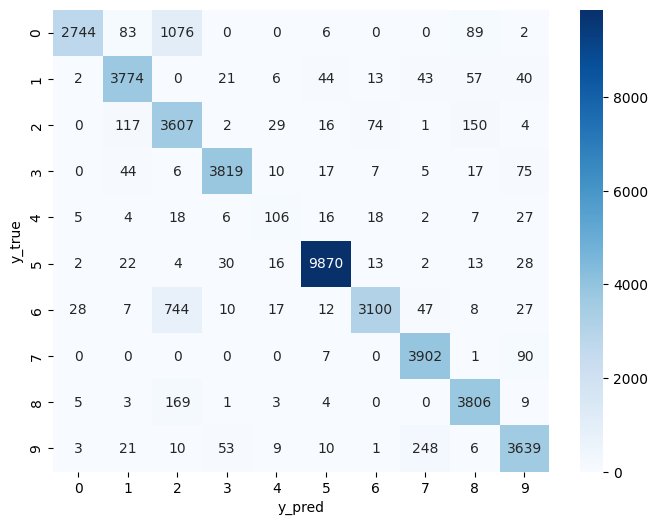

In [15]:
import lightgbm as lgb

lg = lgb.LGBMClassifier()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of LightGBM: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of LightGBM: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of LightGBM: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of LightGBM: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of LightGBM for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
lg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(8,6))
# sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [1]:
%%time
# Train the CatBoost algorithm
import catboost as cbt
cb = cbt.CatBoostClassifier(verbose=0,boosting_type='Plain')
#cb = cbt.CatBoostClassifier()

cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of CatBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of CatBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of CatBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of CatBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of CatBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
cb_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

NameError: name 'X_train' is not defined

In [2]:
%%time
# Train the XGBoost algorithm
import xgboost as xgb
xg = xgb.XGBClassifier()

X_train_x = X_train.values
X_test_x = X_test.values

xg.fit(X_train_x, y_train)

y_pred = xg.predict(X_test_x)
print(classification_report(y_test,y_pred))
print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of XGBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
xg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

NameError: name 'X_train' is not defined